## 프로젝트: 다양한 OCR 모델 비교하기

## Step1. 검증용 데이터셋 준비
- 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관해 검증하기 위한 이미지 데이터
- 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것

In [1]:
import matplotlib.pyplot as plt
import keras_ocr

pipeline=keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [2]:
image_urls=[
    'https://images.unsplash.com/photo-1645337546539-e89bfbd1935f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80',
    'https://images.unsplash.com/photo-1581706537575-8080020a72d7?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=773&q=80',
    'https://source.unsplash.com/M7mu6jXlcns/640x460',
    'https://source.unsplash.com/6jsp4iHc8hI/640x460',
    'https://source.unsplash.com/98uYQ-KupiE',
    'https://source.unsplash.com/j9JoYpaJH3A',
    'https://source.unsplash.com/eBkEJ9cH5b4',
    'https://images.unsplash.com/photo-1592168865720-df6eec2632d9?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=735&q=80',
    'https://images.unsplash.com/photo-1597132252879-e5d72238ca91?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80',
    'https://images.unsplash.com/photo-1568259143690-4bace7f97744?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80',
    'https://images.unsplash.com/photo-1494871262121-49703fd34e2b?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80',
    'https://images.unsplash.com/photo-1554497342-902a4f8da8ed?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80',
    'https://images.unsplash.com/photo-1553002401-c0945c2ff0b0?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=735&q=80'
]

images=[ keras_ocr.tools.read(url) for url in image_urls ]
prediction_groups=[pipeline.recognize([url]) for url in image_urls]

## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

#### keras_ocr 

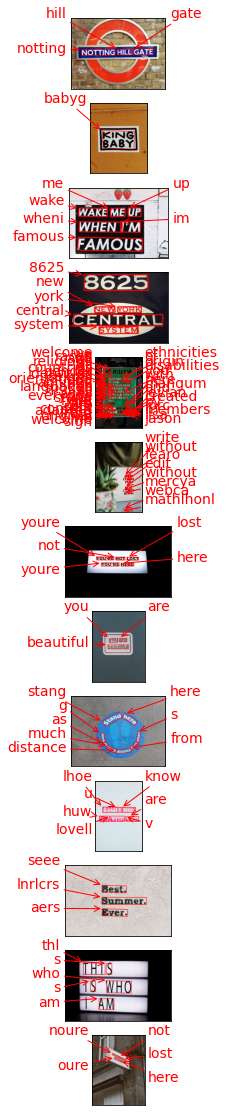

In [5]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### tesseract

In [2]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output

In [4]:
def crop_word_regions(image_path='./images/sample.png',output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config=r'--oem 3 --psm 3'
    image=Image.open(image_path)
    
    recognized_data=pytesseract.image_to_data(
    image,lang='eng',
    config=custom_oem_psm_config,
    output_type=Output.DICT
    )
    
    top_level=max(recognized_data['level'])
    index=0
    cropped_image_path_list=[]
    for i in range(len(recognized_data['level'])):
        level=recognized_data['level'][i]
        
        if level == top_level:
            left= recognized_data['level'][i]
            top=recognized_data['top'][i]
            width=recognized_data['width'][i]
            height=recognized_data['height'][i]
            
            output_img_path=os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image=image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index+=1
    return cropped_image_path_list


In [6]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config=r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image=Image.open(image_path)
        recognized_data=pytesseract.image_to_string(
            image,lang='eng',
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

#### 반복문으로 테러섹트 수행

In [13]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/ocr'
file_list = os.listdir(work_dir) 
file_list

['0019.png',
 'best_summer_ever.JPG',
 '0008.png',
 '0012.png',
 '0003.png',
 '0001.png',
 'notting_hill_gate.JPG',
 '0022.png',
 '0020.png',
 'wake_me_up.JPG',
 '0014.png',
 '0004.png',
 'i_hope_u_know.JPG',
 '0000.png',
 '0007.png',
 '0005.png',
 '0018.png',
 'we_welcome.JPG',
 '0010.png',
 '8625_newyork_central_system.JPG',
 '0021.png',
 '0015.png',
 'this_is_who_i_am.JPG',
 'king_baby.JPG',
 'you_are_beautiful.JPG',
 'you_are_not_lost.JPG',
 '0002.png',
 '0011.png',
 '0006.png',
 '0009.png',
 '0013.png',
 'youre_not_lost.JPG',
 'stand_here.JPG',
 '0017.png',
 '0016.png',
 'write_without_fear.JPG']

원래는 폴더 안에 이미지 jpg만 있었는데 처리 다 한 후에 돌려보니 안에 png 이미지도 생겨버려서.. 저기선 저렇게 파일이 다있지만 원래는 jpg 파일만 있었습니다 ㅜ

In [12]:

for i in file_list:
    cropped_image_path_list=crop_word_regions(work_dir+'/'+i,work_dir)
    print(i)
    recognize_images(cropped_image_path_list)
    print("-----------------------------------------")

/aiffel/aiffel/ocr_python/ocr/0000.png
best_summer_ever.JPG

Done
-----------------------------------------
/aiffel/aiffel/ocr_python/ocr/0000.png
notting_hill_gate.JPG

Done
-----------------------------------------
/aiffel/aiffel/ocr_python/ocr/0000.png
/aiffel/aiffel/ocr_python/ocr/0001.png
/aiffel/aiffel/ocr_python/ocr/0002.png
/aiffel/aiffel/ocr_python/ocr/0003.png
wake_me_up.JPG
WAKE ME U

SWHEN I’

sFAMOU:


Done
-----------------------------------------
/aiffel/aiffel/ocr_python/ocr/0000.png
i_hope_u_know.JPG

Done
-----------------------------------------
/aiffel/aiffel/ocr_python/ocr/0000.png
/aiffel/aiffel/ocr_python/ocr/0001.png
/aiffel/aiffel/ocr_python/ocr/0002.png
/aiffel/aiffel/ocr_python/ocr/0003.png
/aiffel/aiffel/ocr_python/ocr/0004.png
/aiffel/aiffel/ocr_python/ocr/0005.png
/aiffel/aiffel/ocr_python/ocr/0006.png
/aiffel/aiffel/ocr_python/ocr/0007.png
/aiffel/aiffel/ocr_python/ocr/0008.png
/aiffel/aiffel/ocr_python/ocr/0009.png
/aiffel/aiffel/ocr_python/ocr/00

## Step3. 테스트 결과 정리

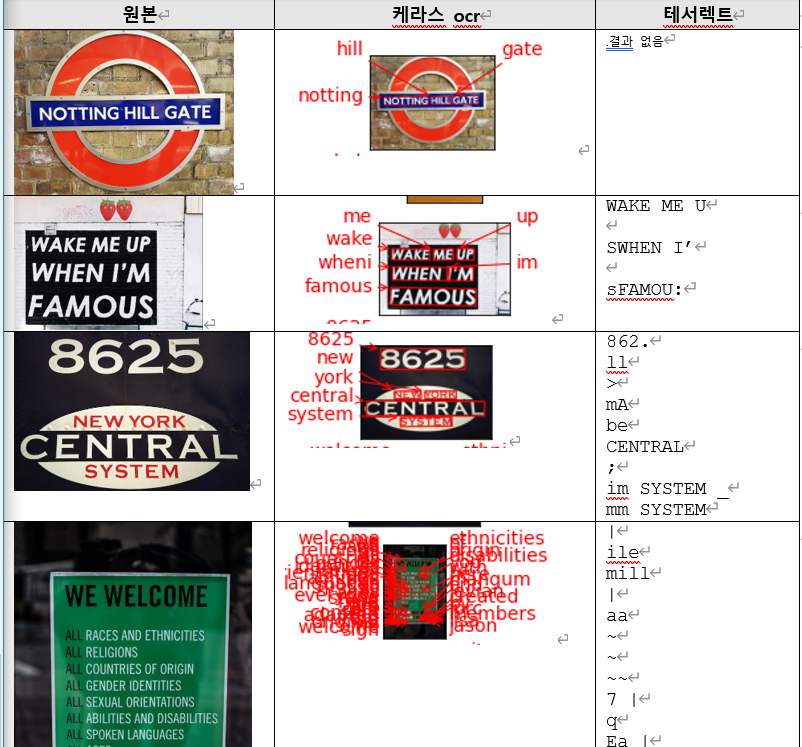
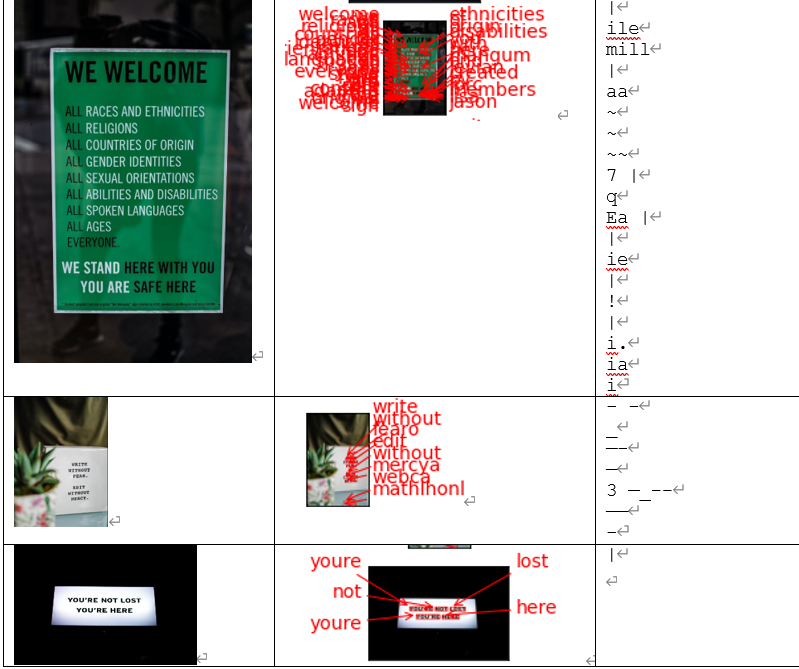
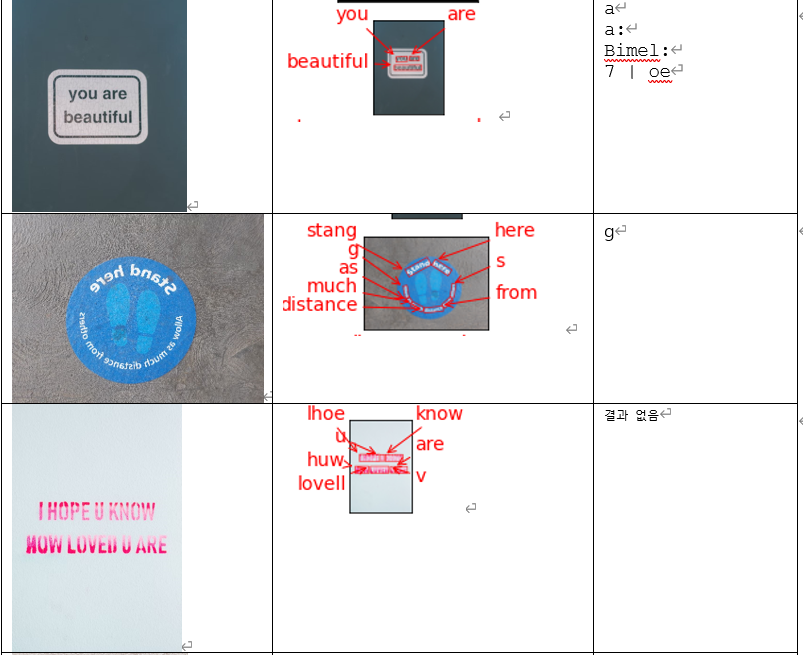
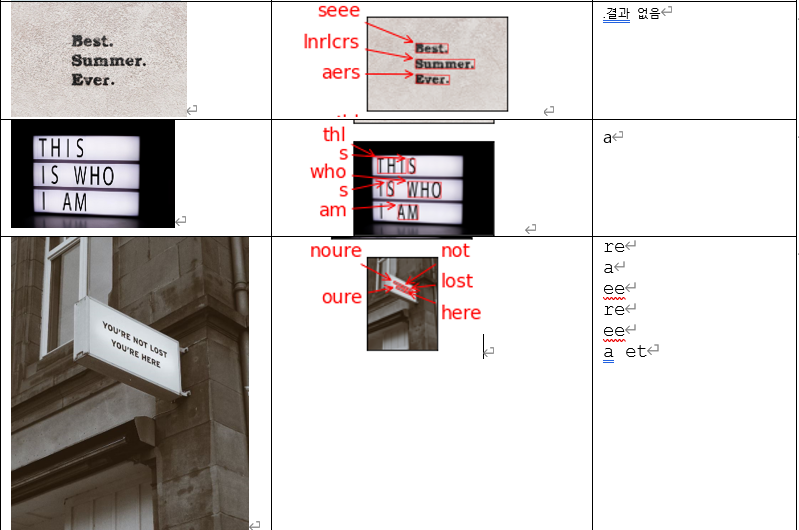

## Step4. 결과 분석과 결론 제시

- 구현하고자 하는 서비스: 카드에 있는 번호 사진으로 인식

- 테스트 결과
keras-ocr 은 영문자와 숫자를 일정 수준으로 파악하고 알파벳을 출력하였다.
하지만 tesseract의 알파벳 인식 수준은 케라스에 비래 너무 처참하게 나와서.. 숫자도 영문자로 인식하는 경우가 많고 영문자와 숫자를 혼용하며 영문자도 제대로 해석하지 못한다. 

따라서 케라스 ocr 서비스를 이용하겠다는 결론이 났다